<a href="https://colab.research.google.com/github/marcosrbenso/leb_DataScience/blob/main/LEB0360_Hidrologia_Vaz%C3%A3o_de_Cursos_d'%C3%A1gua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hydrobr
!pip install geobr

  Preparing metadata (setup.py) ... done
  Created wheel for hydrobr: filename=hydrobr-0.1.1-py3-none-any.whl size=15071 sha256=04b2337ddd63a4d6a783a45ad774d35de5d368368399d0772b595f0c23e60fd9
  Stored in directory: /root/.cache/pip/wheels/02/4f/7c/6a321192de4209adc0e12aa57867ff91671957c896246b894d
Successfully built hydrobr
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.1 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: shapely 2.1.2
    Uninstalling shapely-2.1.2:
      Successfully uninstalled shapely-2.1.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.1.1
    Uninstalling geopandas-1.1.1:
      Successfully uninstalled geopandas-1.1.1


In [2]:
import hydrobr
import geobr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from datetime import datetime
import numpy as np

In [3]:
list_stations = hydrobr.get_data.ANA.list_prec_stations()
list_stations.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [4]:
list_stations['StartDate'] = pd.to_datetime(list_stations['StartDate'], format="%Y/%m/%d", errors='coerce')
list_stations['EndDate'] = pd.to_datetime(list_stations['EndDate'], format="%Y/%m/%d", errors='coerce')
list_stations['StartYear'] = list_stations['StartDate'].dt.year
list_stations['EndYear'] = list_stations['EndDate'].dt.year


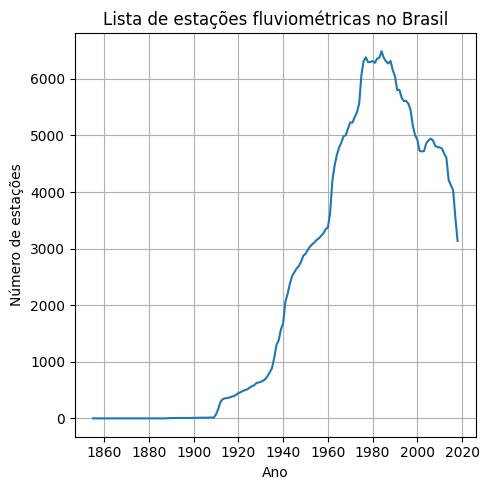

In [5]:
count = []
for year in np.arange(1855,2019,1):

  count.append(sum((list_stations['StartYear'] <= year) & (list_stations['EndYear'] > year)))

df = pd.DataFrame({'Ano': np.arange(1855,2019,1), 'Quantidade': count})



fig, ax = plt.subplots(figsize=(5, 5)) # Adjust figsize as needed
plt.plot(df['Ano'],df['Quantidade'])

plt.grid(True)

ax.set_title('Lista de estações fluviométricas no Brasil')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de estações')
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

In [6]:
brasil = geobr.read_country()




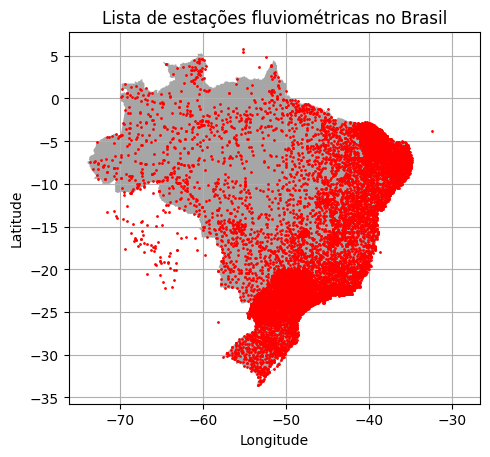

In [7]:

fig, ax = plt.subplots(figsize=(5, 5)) # Adjust figsize as needed
brasil.plot(ax=ax, color='gray', alpha=0.7, legend=True) # Customize appearance
plt.plot(list_stations['Longitude'],list_stations['Latitude'],'o',markersize=1,color='red')
plt.grid(True)

ax.set_title('Lista de estações fluviométricas no Brasil')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

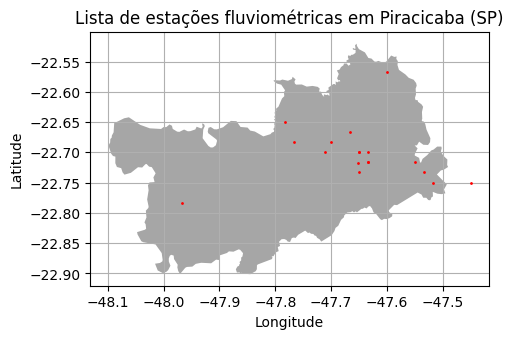

In [8]:
pira = geobr.read_municipality(3538709)
pira_stations = list_stations[list_stations['City']=="PIRACICABA"]

fig, ax = plt.subplots(figsize=(5, 5)) # Adjust figsize as needed
pira.plot(ax=ax, color='gray', alpha=0.7, legend=True) # Customize appearance
plt.plot(pira_stations['Longitude'],pira_stations['Latitude'],'o',markersize=1,color='red')
plt.grid(True)

ax.set_title('Lista de estações fluviométricas em Piracicaba (SP)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

In [9]:

url = "https://raw.githubusercontent.com/marcosrbenso/leb_DataScience/main/data/4D007_Cotas_Diarias_Serie_20251007_220749.csv"
url2 = "https://raw.githubusercontent.com/marcosrbenso/leb_DataScience/main/data/4D007_Vazoes_Medias_Diarias_Serie_20251007_222548.csv"

data = pd.read_csv(url,skiprows=12,delimiter=';',decimal=',')
data.head()

data_flow = pd.read_csv(url2,skiprows=12,delimiter=';',decimal=',')
data_flow.head()



,Mês/Ano,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,Vazão Mínima,Vazão Média,Vazão Máxima
0,06/1943,"74,618",73.764,"75,474","73,764","74,191","72,487","71,637","84,999",96.509,...,"69,522","71,213",70.790,69.100,"70,790","69,522",---,69.100,78.025,"97,405"
1,07/1943,"69,944",69.100,"69,944","68,258","60,765","64,908","64,076","62,416",63.245,...,"55,049","51,430",54.241,58.712,"59,122","55,454","56,266",51.430,60.930,"69,944"
2,08/1943,"51,830",50.234,"52,632","53,838","55,049","55,049","53,838","52,632",49.439,...,"49,439","51,830",59.532,64.908,"65,743","56,672","57,487",47.462,52.855,"65,743"
3,09/1943,"55,454",54.241,"55,049","55,049","52,632","42,779","45,110","43,553",44.720,...,"66,161","69,944",69.100,59.122,"63,660","61,590",---,42.779,55.177,"69,944"
4,10/1943,"62,003",57.079,"53,838","51,031","77,621","101,456","97,854","80,211",69.522,...,"77,621","75,474",74.191,152.660,"198,003","187,858","173,323",51.031,93.233,"198,003"


In [10]:
# Converte de formato largo para longo
data_long = data.melt(id_vars=['Mês/Ano', 'Hora'],
                      var_name='Dia',
                      value_name='Cota')

# Garante que as colunas sejam strings sem espaços
data_long['Mês/Ano'] = data_long['Mês/Ano'].astype(str).str.strip()
data_long['Dia'] = data_long['Dia'].astype(str).str.strip()
# Cria a coluna de data completa (Dia/Mês/Ano)
data_long['Data'] = pd.to_datetime(
    data_long['Dia'] + '/' + data_long['Mês/Ano'],
    format='%d/%m/%Y',
    errors='coerce'
)

# Remove linhas onde a conversão falhou
data_long = data_long.dropna(subset=['Data', 'Cota'])
data_long['Cota'] = data_long['Cota'].fillna('-')



data_long['Cota'] = (
    data_long['Cota']
    .astype(str)
    .str.replace(',', '.', regex=False)  # vírgula → ponto
)
data_long['Cota'] = pd.to_numeric(data_long['Cota'], errors='coerce')

cota = data_long.groupby('Data')['Cota'].mean().reset_index()
cota.head()





,Data,Cota
0,1943-06-01,1.535
1,1943-06-02,1.525
2,1943-06-03,1.545
3,1943-06-04,1.525
4,1943-06-05,1.530


In [11]:
# Converte de formato largo para longo
data_flow_long = data_flow.melt(id_vars=['Mês/Ano'],
                      var_name='Dia',
                      value_name='Vazao')

# Garante que as colunas sejam strings sem espaços
data_flow_long['Mês/Ano'] = data_flow_long['Mês/Ano'].astype(str).str.strip()
data_flow_long['Dia'] = data_flow_long['Dia'].astype(str).str.strip()

# Cria a coluna de data completa (Dia/Mês/Ano)
data_flow_long['Data'] = pd.to_datetime(
    data_flow_long['Dia'] + '/' + data_flow_long['Mês/Ano'],
    format='%d/%m/%Y',
    errors='coerce'
)

# Remove linhas onde a conversão falhou
data_flow_long = data_flow_long.dropna(subset=['Data', 'Vazao'])
data_flow_long['Vazao'] = data_flow_long['Vazao'].fillna('-')


data_flow_long['Vazao'] = (
    data_flow_long['Vazao']
    .astype(str)
    .str.replace(',', '.', regex=False)  # vírgula → ponto
)

data_flow_long['Vazao'] = pd.to_numeric(data_flow_long['Vazao'], errors='coerce')

vazao = data_flow_long.groupby('Data')['Vazao'].mean().reset_index()
vazao.head()


,Data,Vazao
0,1943-06-01,74.618
1,1943-06-02,73.764
2,1943-06-03,75.474
3,1943-06-04,73.764
4,1943-06-05,74.191


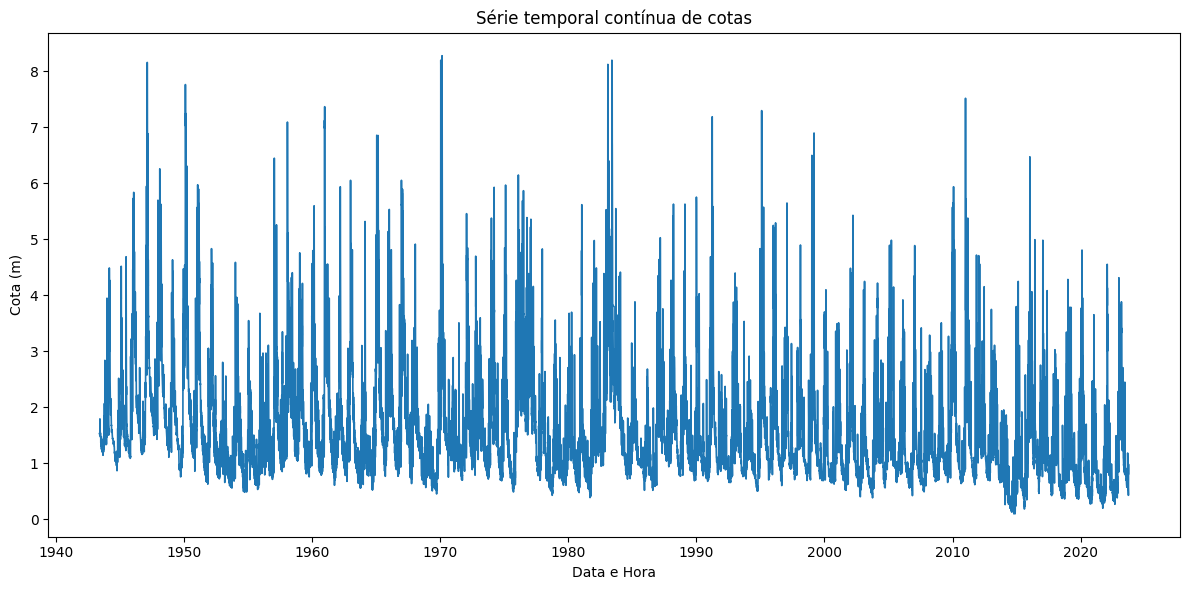

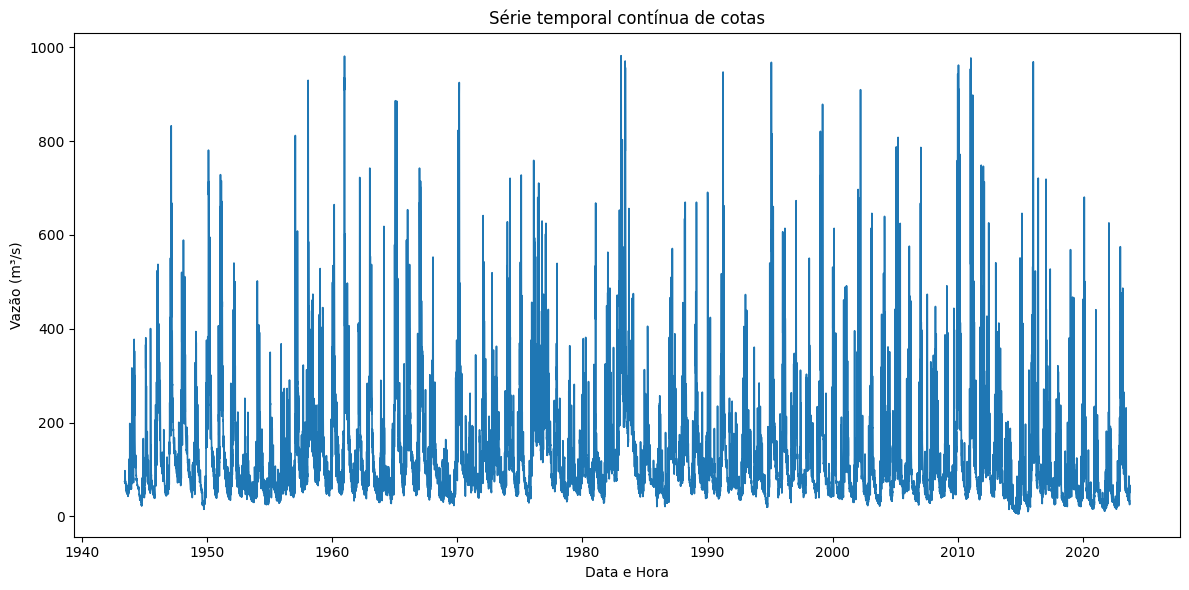

In [12]:
plt.figure(figsize=(12,6))
sbn.lineplot(data=cota, x='Data', y='Cota', linewidth=1.2)
plt.title('Série temporal contínua de cotas')
plt.xlabel('Data e Hora')
plt.ylabel('Cota (m)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sbn.lineplot(data=vazao, x='Data', y='Vazao', linewidth=1.2)
plt.title('Série temporal contínua de cotas')
plt.xlabel('Data e Hora')
plt.ylabel('Vazão (m³/s)')
plt.tight_layout()
plt.show()



<Axes: xlabel='Cota', ylabel='Vazao'>

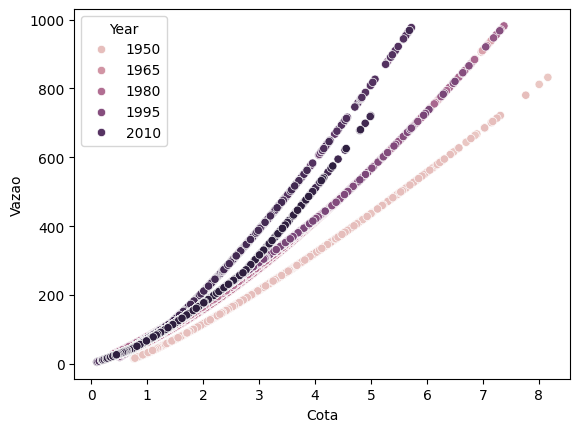

In [70]:
df_flow = pd.DataFrame({'Vazao': vazao['Vazao'], 'Cota': cota['Cota'], 'Year': cota['Data'].dt.year})
df_flow = df_flow.dropna()
# Show the results of a linear regression within each dataset
sbn.scatterplot(
    data=df_flow, x="Cota", y="Vazao", hue = "Year"

)